In [9]:
import pandas as pd

In [10]:
# Load MutPred2 predictions
mutpred_predictions = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\MutPred2\\all_predictions.csv", header=None)
mutpred_predictions

,0,1,2,3,4,5
0,FGFR1_HUMAN,F9S,0.828,Altered Disordered interface (Pr = 0.25 | P = ...,ELME000041|ELME000106|ELME000137|ELME000146,-
1,FGFR1_HUMAN,W10P,0.922,Altered Ordered interface (Pr = 0.24 | P = 0.0...,ELME000041|ELME000137,-
2,FGFR1_HUMAN,A11R,0.872,Altered Disordered interface (Pr = 0.37 | P = ...,ELME000041|ELME000106,-
3,FGFR1_HUMAN,V12S,0.881,Altered Signal peptide (Pr = 0.16 | P = 4.8e-04),ELME000041|ELME000063|ELME000333|ELME000336,-
4,FGFR1_HUMAN,V14F,0.895,Altered Signal peptide (Pr = 0.21 | P = 2.6e-04),ELME000041|ELME000052|ELME000080|ELME000333|E...,-
...,...,...,...,...,...,...
4503,COL4A3_HUMAN,G1045V,0.957,NaN,ELME000231|ELME000233,-
4504,COL4A3_HUMAN,G871C,0.894,Altered Disordered interface (Pr = 0.27 | P = ...,None,-
4505,COL4A3_HUMAN,G853R,0.917,Loss of Loop (Pr = 0.30 | P = 7.9e-03); Altere...,ELME000062,-
4506,COL4A3_HUMAN,P25S,0.286,-,-,-


In [11]:
# add headers
column_names = ["gene", "variant", "MutPred_score", "explain", "MutPred_pred", "nothing"]
mutpred_predictions.columns = column_names
mutpred_predictions = mutpred_predictions.drop(columns=["nothing", "explain", "MutPred_pred"])
mutpred_predictions

,gene,variant,MutPred_score
0,FGFR1_HUMAN,F9S,0.828
1,FGFR1_HUMAN,W10P,0.922
2,FGFR1_HUMAN,A11R,0.872
3,FGFR1_HUMAN,V12S,0.881
4,FGFR1_HUMAN,V14F,0.895
...,...,...,...
4503,COL4A3_HUMAN,G1045V,0.957
4504,COL4A3_HUMAN,G871C,0.894
4505,COL4A3_HUMAN,G853R,0.917
4506,COL4A3_HUMAN,P25S,0.286


In [12]:
# Delete the _HUMAN from the gene name
mutpred_predictions["gene"] = mutpred_predictions["gene"].str.replace("_HUMAN", "")
print(len(mutpred_predictions))

4508


In [13]:
# remove duplicates
mutpred_predictions = mutpred_predictions.drop_duplicates(subset=["gene", "variant"], keep="first")
print(len(mutpred_predictions))

4489


In [14]:
# Remove VUS variants
mutpred_predictions["MutPred_score"] = pd.to_numeric(mutpred_predictions['MutPred_score'], errors='coerce')
# Remove rows with revel score: 0.29 < revel score < 0.644
mutpred_VUS = mutpred_predictions[(mutpred_predictions["MutPred_score"] < 0.737) & (mutpred_predictions["MutPred_score"] >= 0.391)]
mutpred_predictions = mutpred_predictions[(mutpred_predictions["MutPred_score"] >= 0.737) | (mutpred_predictions["MutPred_score"] <= 0.391)]
mutpred_predictions

C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_23252\3920941166.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  mutpred_predictions["MutPred_score"] = pd.to_numeric(mutpred_predictions['MutPred_score'], errors='coerce')


,gene,variant,MutPred_score
0,FGFR1,F9S,0.828
1,FGFR1,W10P,0.922
2,FGFR1,A11R,0.872
3,FGFR1,V12S,0.881
4,FGFR1,V14F,0.895
...,...,...,...
4503,COL4A3,G1045V,0.957
4504,COL4A3,G871C,0.894
4505,COL4A3,G853R,0.917
4506,COL4A3,P25S,0.286


In [15]:
# Add benign or pathogenic label to each variant, according to the VEST4 score.
mutpred_predictions["MutPred_pathogenicity"] = mutpred_predictions["MutPred_score"].apply(lambda x: 1 if x >= 0.764 else 0)
mutpred_predictions

,gene,variant,MutPred_score,MutPred_pathogenicity
0,FGFR1,F9S,0.828,1
1,FGFR1,W10P,0.922,1
2,FGFR1,A11R,0.872,1
3,FGFR1,V12S,0.881,1
4,FGFR1,V14F,0.895,1
...,...,...,...,...
4503,COL4A3,G1045V,0.957,1
4504,COL4A3,G871C,0.894,1
4505,COL4A3,G853R,0.917,1
4506,COL4A3,P25S,0.286,0


In [17]:
# print how many pathogenic and benign variants are in the EVE file
print(f"Number of pathogenic variants in MutPred: {len(mutpred_predictions[mutpred_predictions['MutPred_pathogenicity'] == 1])}")
print(f"Number of benign variants in MutPred: {len(mutpred_predictions[mutpred_predictions['MutPred_pathogenicity'] == 0])}")

Number of pathogenic variants in MutPred: 1699
Number of benign variants in MutPred: 1827


In [18]:
print(f"length of revel without VUS {len(mutpred_predictions)}")
print(f"length of revel VUS {len(mutpred_VUS)}")

length of revel without VUS 3526
length of revel VUS 964


In [19]:
# Combine the prediction files into one file
my_prediction = pd.read_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\all_inbar_predictions.csv")
my_prediction

,position,pathogenicity,predictions,variant,gene
0,6,0,0,G6S,SLC26A4
1,21,0,1,M21V,SLC26A4
2,51,0,0,A51T,SLC26A4
3,53,0,1,C53G,SLC26A4
4,163,0,1,V163I,SLC26A4
...,...,...,...,...,...
4516,1045,1,1,G1045V,COL4A3
4517,871,1,1,G871C,COL4A3
4518,853,1,1,G853R,COL4A3
4519,25,0,0,P25S,COL4A3


In [20]:
# Merge the two files
merged = pd.merge(my_prediction, mutpred_predictions, on=["gene", "variant"])
merged

,position,pathogenicity,predictions,variant,gene,MutPred_score,MutPred_pathogenicity
0,6,0,0,G6S,SLC26A4,0.064,0
1,21,0,1,M21V,SLC26A4,0.022,0
2,51,0,0,A51T,SLC26A4,0.140,0
3,53,0,1,C53G,SLC26A4,0.125,0
4,163,0,1,V163I,SLC26A4,0.034,0
...,...,...,...,...,...,...,...
3546,1045,1,1,G1045V,COL4A3,0.957,1
3547,871,1,1,G871C,COL4A3,0.894,1
3548,853,1,1,G853R,COL4A3,0.917,1
3549,25,0,0,P25S,COL4A3,0.286,0


In [21]:
# To make sure that all tools will be tested on the same variants, save the merged with REVEL file and do so for all other tools. Then merge all the files together.
merged_only_VEST4_columns = merged[['gene', 'variant', 'MutPred_score', 'MutPred_pathogenicity']]
merged_only_VEST4_columns.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\benchmarking\\MutPred_on_dvd_data_predictions.csv")

In [22]:
print(f"length of merged {len(merged)}")
print(f"length of my_prediction {len(my_prediction)}")
print(f"length of mutpred {len(mutpred_predictions)}")

length of merged 3551
length of my_prediction 4521
length of mutpred 3526


In [ ]:
#############################################################################################################
# All next rows were used to calculate the MCC, before realised I must apply first the threshold and remove the VUS variants. Now all these rows aren't in use, since I'm doing the calculations after removing the VUS variants and with all tools together.
#############################################################################################################

In [11]:
# # Save the merged file to csv
# merged.to_csv("C:\\Users\\InbarBlech\\PycharmProjects\\Thesis\\predictions_vs_real\\merged_my_prediction_and_mutpred.csv", index=False)

In [12]:
## Calculate the MCC for the mutpred predictions, according to the real pathogenicity (0 or 1)
from sklearn.metrics import matthews_corrcoef

In [13]:
# separate the merged dataframe according to gene
genes = merged["gene"].unique()
print(f"Number of genes: {len(genes)}")

Number of genes: 7


In [14]:
# Calculate MCC for each gene specific predictor for mutpred

# Build dictionary with gene names as keys.
mccs = {gene: 0 for gene in genes}

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    # Assuming you have a DataFrame called 'data' with 'prediction' and 'MutPred_score' columns
    # Create binary predictions based on the 0.5 threshold
    gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
    
    gene_df['predictions'] = gene_df['predictions'].astype(int)
    
    # Calculate MCC
    mcc = matthews_corrcoef(gene_df['predictions'], gene_df['binary_prediction_mutpred'])
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    
    # Append mcc to dictionary
    mccs[gene] = mcc

print("MCCs of MutPred2 predictions for each gene:")
for gene in mccs:
    print(f"{gene}: {mccs[gene]}")


MCCs of MutPred2 predictions for each gene:
SLC26A4: 0.15259306987780416
WFS1: 0.27047738102203456
FGFR1: 0.2146459107915985
COL2A1: 0.39302592901503747
COL4A5: 0.32236168060924053
MYO7A: 0.10378297483419295
COL4A3: 0.4002491217530219


C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\210585993.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\210585993.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df['predictions'] = gene_df['predictions'].astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\210585993.py:10: SettingWithCopyWarning: 
A value is trying to be set 

In [15]:
from sklearn.metrics import roc_auc_score, roc_curve, auc, precision_recall_curve, average_precision_score, f1_score, log_loss, confusion_matrix
# store the results in a dictionary
results = {gene: 0 for gene in genes}

for gene in genes:
    gene_df = merged[merged["gene"] == gene]
    y_true = gene_df["pathogenicity"].astype(int)
    predicted_probabilities = gene_df["MutPred_score"]
    gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
    predicted_labels = gene_df["binary_prediction_mutpred"]
    
    results_gene = {}
    # Calculate AUC-ROC
    roc_auc = roc_auc_score(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["roc_auc"] = roc_auc
    
    # Calculate ROC curve
    fpr, tpr, thresholds = roc_curve(y_true, predicted_probabilities)
    roc_auc = auc(fpr, tpr)
    # append to dictionary
    results_gene["auc"] = roc_auc
    
    # Calculate AUC-PR
    precision, recall, _ = precision_recall_curve(y_true, predicted_probabilities)
    pr_auc = auc(recall, precision)
    # append to dictionary
    results_gene["pr_auc"] = pr_auc
    
    # Calculate F1 Score
    f1 = f1_score(y_true, predicted_labels)
    # append to dictionary
    results_gene["f1"] = f1
    
    # Calculate Log Loss
    logloss = log_loss(y_true, predicted_probabilities)
    # append to dictionary
    results_gene["logloss"] = logloss
    
    # Calculate confusion matrix
    conf_matrix = confusion_matrix(y_true, predicted_labels)
    # append to dictionary
    results_gene["confusion_matrix"] = conf_matrix
    
    # Get gene name for the use for the dictionary
    gene = gene_df['gene'].unique()[0]
    # Append results to dictionary
    results[gene] = results_gene
    
## Print results
print("Results of MutPred2 predictions for each gene:")
for gene in results:
    print(f"{gene}: {results[gene]}")

Results of MutPred2 predictions for each gene:
SLC26A4: {'roc_auc': 0.9161154273029967, 'auc': 0.9161154273029967, 'pr_auc': 0.9643660044525841, 'f1': 0.8893360160965795, 'logloss': 0.3914826482831177, 'confusion_matrix': array([[ 74,  11],
       [ 44, 221]], dtype=int64)}
WFS1: {'roc_auc': 0.9173030197847969, 'auc': 0.9173030197847969, 'pr_auc': 0.911353303775168, 'f1': 0.8588588588588588, 'logloss': 0.38289864413837404, 'confusion_matrix': array([[116,  18],
       [ 29, 143]], dtype=int64)}
FGFR1: {'roc_auc': 0.7911045218680502, 'auc': 0.7911045218680502, 'pr_auc': 0.5732170857169547, 'f1': 0.54627539503386, 'logloss': 0.8377981011409353, 'confusion_matrix': array([[166, 189],
       [ 12, 121]], dtype=int64)}
COL2A1: {'roc_auc': 0.9551202944868102, 'auc': 0.9551202944868102, 'pr_auc': 0.9012171345632055, 'f1': 0.700507614213198, 'logloss': 0.5233739998173843, 'confusion_matrix': array([[437, 226],
       [ 10, 276]], dtype=int64)}
COL4A5: {'roc_auc': 0.993467837080172, 'auc': 0.99

C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\2254649920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\2254649920.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gene_df.loc[:, 'binary_prediction_mutpred'] = (gene_df['MutPred_score'] > 0.5).astype(int)
C:\Users\InbarBlech\AppData\Local\Temp\ipykernel_16872\2254649920.py:9: SettingWithCopyWarning

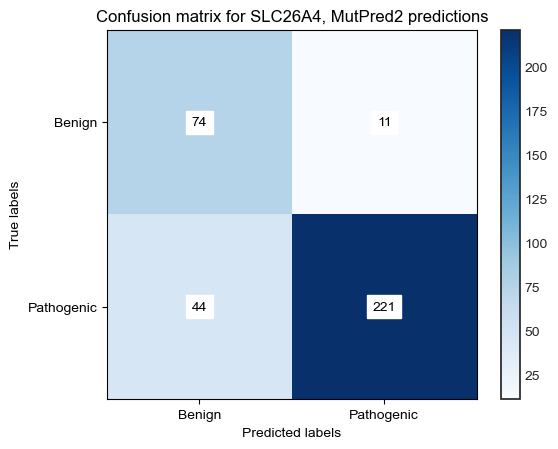

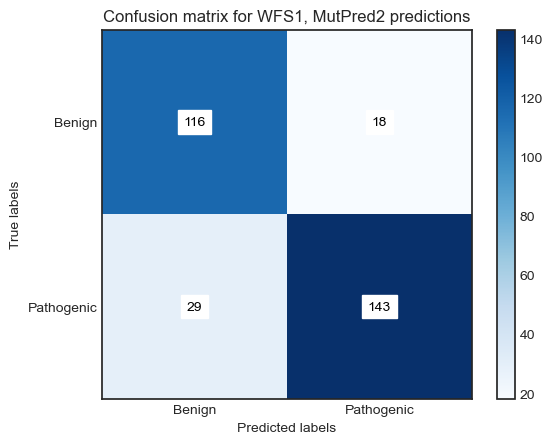

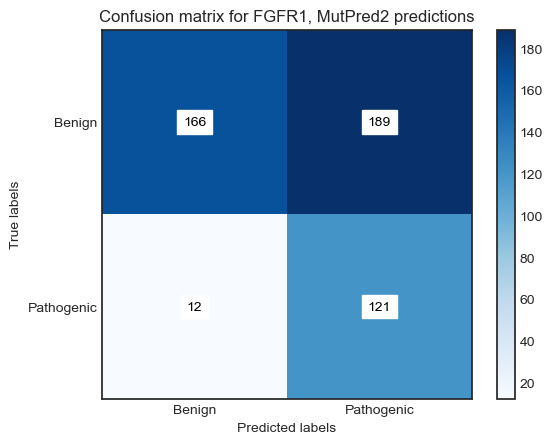

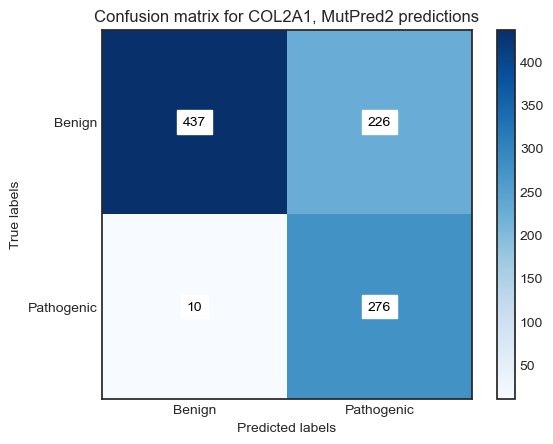

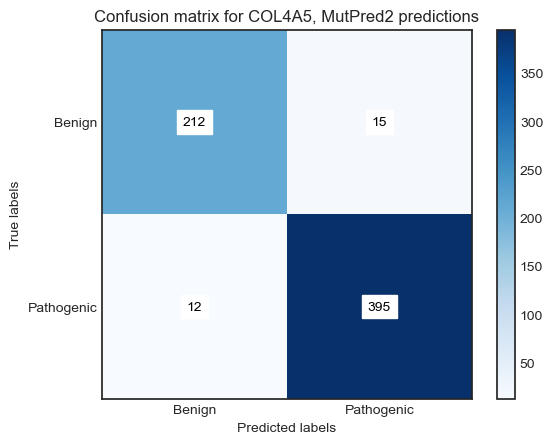

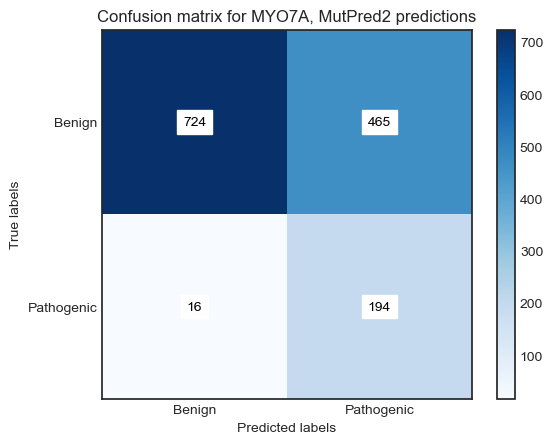

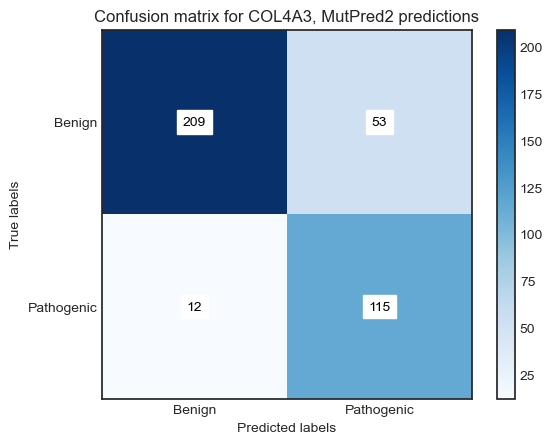

In [16]:
# present the confusion matrix for each gene
import matplotlib.pyplot as plt

for gene in results:
    # Plot confusion matrix
    plt.imshow(results[gene]["confusion_matrix"], cmap=plt.cm.Blues)
    plt.xlabel("Predicted labels")
    plt.ylabel("True labels")
    plt.xticks([0, 1], ["Benign", "Pathogenic"])
    plt.yticks([0, 1], ["Benign", "Pathogenic"])
    plt.title(f"Confusion matrix for {gene}, MutPred2 predictions")
    plt.style.use("seaborn-white")
    # Add text annotations
    for i in range(2):
        for j in range(2):
            plt.text(j, i, results[gene]["confusion_matrix"][i, j], ha="center", va="center", color="black", backgroundcolor="white")
    plt.colorbar()
    plt.show()

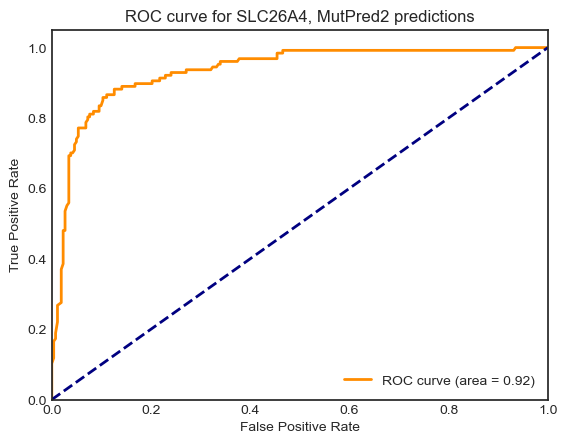

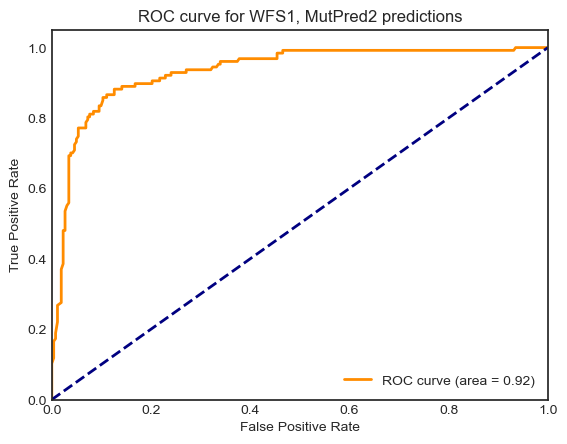

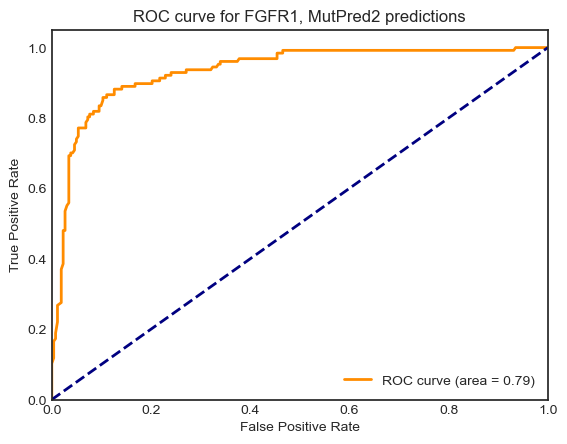

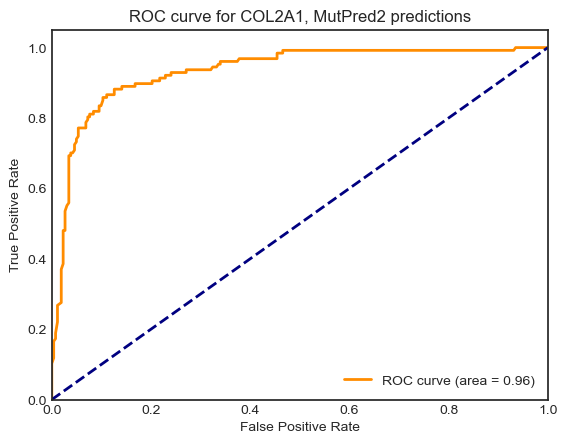

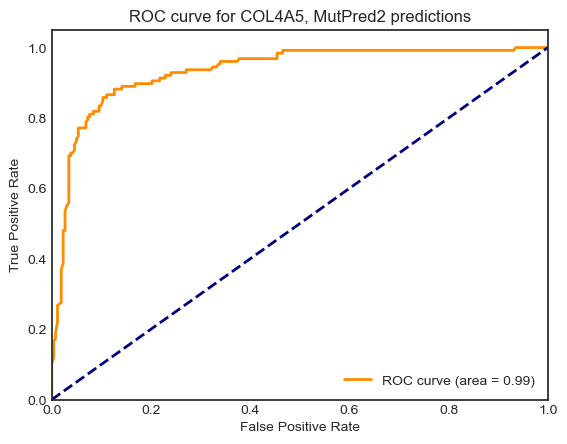

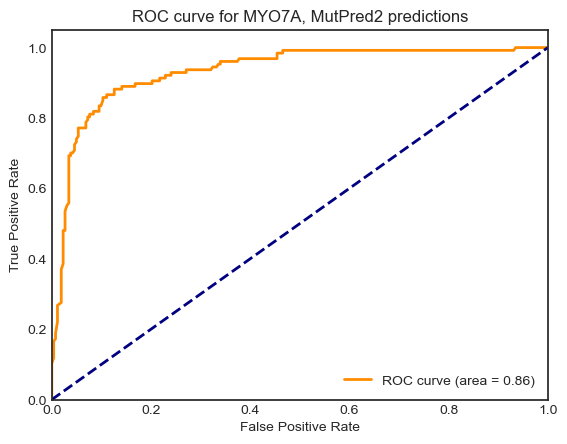

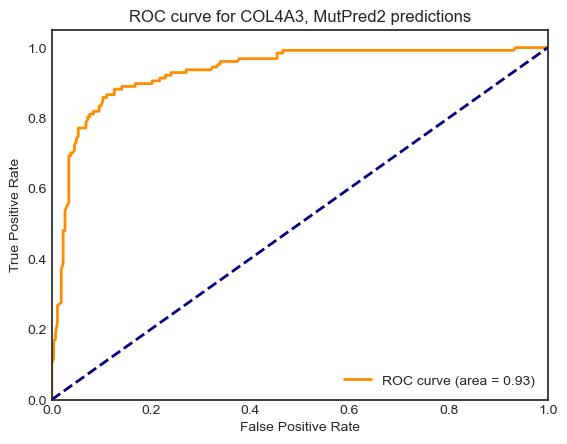

In [17]:
# present the ROC curve for each gene
for gene in results:
    # Plot ROC curve
    plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (area = {results[gene]['roc_auc']:.2f})")
    plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--")
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC curve for {gene}, MutPred2 predictions")
    plt.legend(loc="lower right")
    plt.show()